<a href="https://colab.research.google.com/github/vkjadon/sklearn/blob/main/Ex6-makeCircleCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
data, target = datasets.make_circles(n_samples=1000, random_state=100, noise=0.02)
# Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=False)
print(X_train.shape)

(800, 2)


In [4]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [5]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [6]:
# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101, max_features=None,min_samples_leaf=5)

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1, random_state=101,max_features=None,min_samples_leaf=3)

In [9]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [10]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101, tol=1e-3,max_iter=1000)

In [89]:
# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs',alpha=0.00001,max_iter=500,activation='relu',hidden_layer_sizes=(10,20, 10),random_state=1, shuffle=True)

In [90]:
# classification methods
m = [nb,lr,sgd,knn,dtree,rfm,svm,nn]
s = ['nb','lr','sgd','knn','dt','rfm','svm','nn']

In [91]:
# fit classifiers
print('Train Classifiers')
for i,x in enumerate(m):
    st = time.time()
    x.fit(X_train,y_train)
    tf = str(round(time.time()-st,5))
    score=x.score(X_test, y_test)
    print(s[i] + ' time: ' + tf + ' Score ' + str(score) )

Train Classifiers
nb time: 0.00149 Score 0.865
lr time: 0.00503 Score 0.45
sgd time: 0.00625 Score 0.48
knn time: 0.00075 Score 1.0
dt time: 0.00282 Score 0.955
rfm time: 0.17902 Score 0.955
svm time: 0.00982 Score 1.0
nn time: 0.25046 Score 0.995


In [92]:
y_pred = nn.predict(X_test)
print(' predicts: ' + str(y_pred[0]))
print('Label: ' + str(y_test[0]))

 predicts: 1
Label: 1


In [93]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

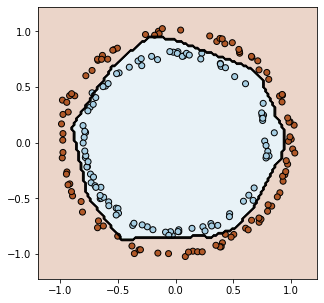

In [94]:
plot_decision_boundary(nn, X_test, y_test)